In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import pandas as pd

In [2]:
from __future__ import unicode_literals

In [3]:
het = pd.read_csv('ocr_subs_ocr_gt.csv', encoding='utf-8')
het.sort_values('count',ascending=False)
#making the matrix
result = het.pivot(index='gt',columns='ocr',values='count')
#Row Normalisation
result  = result.div(result.sum(axis=1), axis=0)

In [4]:
#Filtering Non-Diagonal ones
#Picking up the max col in each row.

k = result.idxmax(axis=1)

#Dataframe conversion
k = pd.DataFrame(k,columns=['ocr'])

# Putting index (row names) back as a  column
k['gt'] = k.index

#Selecting those entries where non-y ones are majority
new_k_ocr = k[k['ocr']!=k['gt']]
new_k_ocr = new_k_ocr[new_k_ocr['gt']!='ō']
new_k_ocr = new_k_ocr[new_k_ocr['ocr']!="'"]
new_k_ocr = new_k_ocr[new_k_ocr['gt']!=':']
new_k_ocr = new_k_ocr[new_k_ocr['gt']!=',']

final_set = list(set(new_k_ocr['gt']).union(set(new_k_ocr['ocr'])))
final_set.remove('*')
final_set.remove('f')
final_set = final_set + ['p']

In [5]:
dep_results = result.loc[final_set,final_set]
dep_results = dep_results.fillna(0)

# OCR-Heatmap

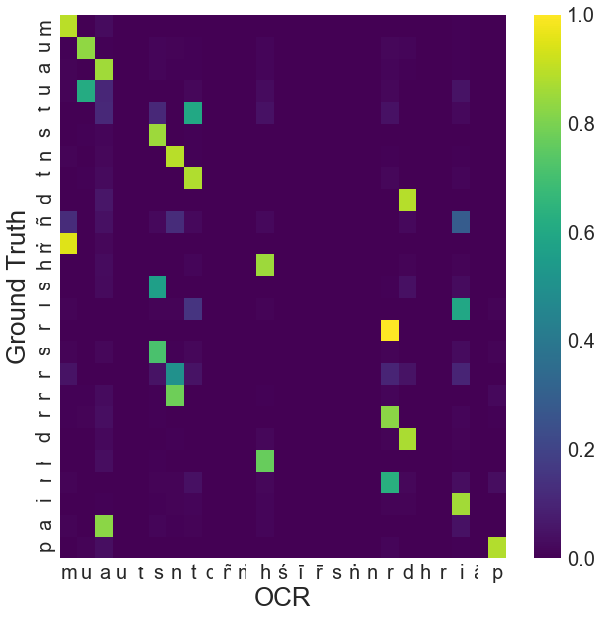

In [6]:
matplotlib.rc('font', family='Arial')
ptt = plt.figure(figsize=(10,10))
sns.set_context("paper", rc={"font.size":14, "axes.labelsize":26, "ytick.labelsize":20, "xtick.labelsize":20, "ytick.labelsize":20})
sns.heatmap(dep_results,  annot=False, fmt="d", cmap='viridis')
plt.xlabel("OCR")
plt.ylabel("Ground Truth")
# ptt.savefig('heatmap_ocr.eps',bbox_inches='tight',dpi=1000,font_scale=3.2)
# ptt.show()

# CopyNet-Heatmap

In [7]:
het = pd.read_csv('copynet_subs_pred_gt.csv')
het.sort_values('count',ascending=False)

result = het.pivot(index='gt',columns='pred',values='count')
result  = result.div(result.sum(axis=1), axis=0)
k = result.idxmax(axis=1)
k = pd.DataFrame(k,columns=['pred'])
k['gt'] = k.index
new_k = k[k['pred']!=k['gt']]
new_k = new_k[new_k['gt']!='ō']
print(new_k)
# dep_results = result.loc[[u"{}".format(c) for c in list(new_k['gt'])],list(new_k['pred'])]
dep_results = result.loc[final_set,final_set]
dep_results = dep_results.fillna(0)

   pred gt
gt        
*     o  *
,     *  ,
:     ḥ  :


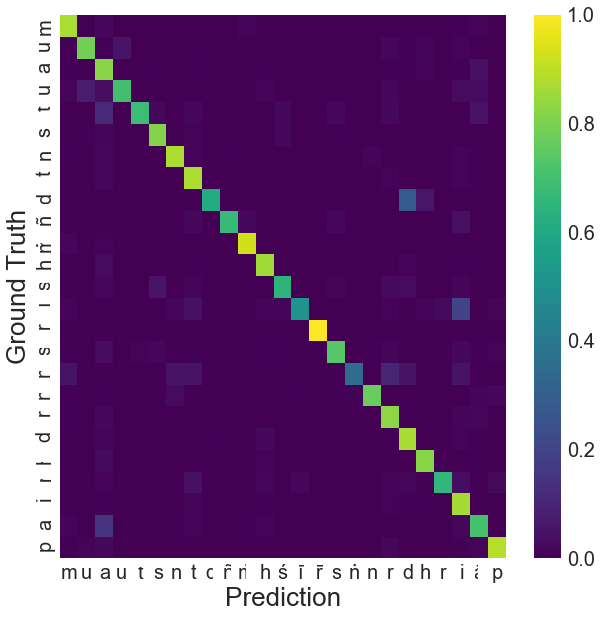

In [8]:
matplotlib.rc('font', family='Arial')
ptt = plt.figure(figsize=(10,10))

sns.set_context("paper", rc={"font.size":14, "axes.labelsize":26, "ytick.labelsize":20, "xtick.labelsize":20, "ytick.labelsize":20})
sns.heatmap(dep_results,  annot=False, fmt="d", cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Ground Truth")
# ptt.savefig('heatmap_copynet.eps', bbox_inches='tight',dpi=1000,font_scale=3.2)
# ptt.show()

# PCRF-Heatmap

In [9]:
het = pd.read_csv('pcrf_subs_pred_gt.csv')
het.sort_values('count',ascending=False)

result = het.pivot(index='gt',columns='pred',values='count')
result  = result.div(result.sum(axis=1), axis=0)
k = result.idxmax(axis=1)
k = pd.DataFrame(k,columns=['pred'])
k['gt'] = k.index
new_k = k[k['pred']!=k['gt']]
new_k = new_k[new_k['gt']!='ō']
print(new_k)
# dep_results = result.loc[[u"{}".format(c) for c in list(new_k['gt'])], list(new_k['pred'])]
dep_results = result.loc[final_set,final_set]
dep_results = dep_results.fillna(0)

   pred gt
gt        
*     j  *
,     *  ,
:     ḥ  :
ñ     i  ñ
’     p  ’


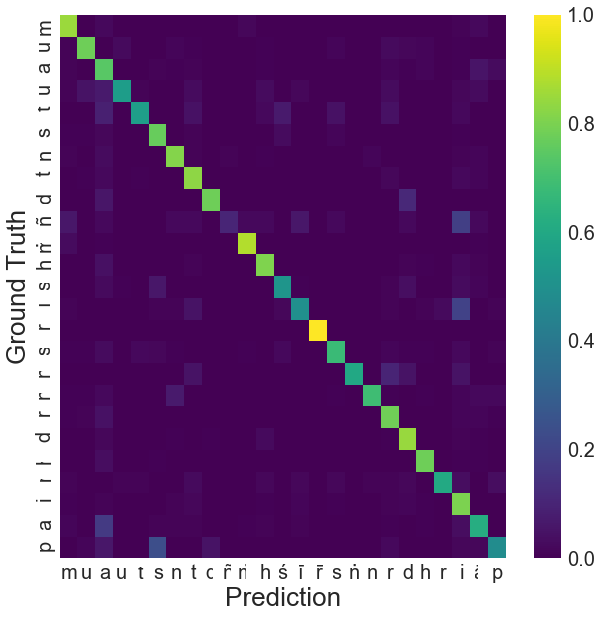

In [10]:
matplotlib.rc('font', family='Arial')
ptt = plt.figure(figsize=(10,10))

sns.set_context("paper", rc={"font.size":14, "axes.labelsize":26, "ytick.labelsize":20, "xtick.labelsize":20, "ytick.labelsize":20})
sns.heatmap(dep_results,  annot=False, fmt="d", cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Ground Truth")
# ptt.savefig('heatmap_pcrf.eps',bbox_inches='tight',dpi=1000,font_scale=3.2)
# ptt.show()